# The CNOT Gate and the Bell State

You have already seen the Hadamard Gate which puts a single Qubit into a superposition.

## CNOT Gate

You will now see an example of the CNOT gate which involves two qubits
* The control qubit
* The target qubit


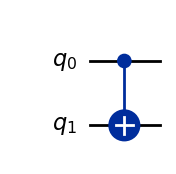

In [5]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)
# Create a controlled-NOT gate (CNOT) with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)
qc.draw('mpl')  # Draw the circuit using matplotlib

## Combining Gates

For anything to now happen we need the control qubit to do something. To get the control qubit to do something, we can put it through a Hadamard gate - which will put it into a superposition.

### Combining the Hadamard Gate and the CNOT Gate to form the Bell State
A combination of the hadamard gate and the CNOT gate is a great example of a slightly more sophisticated quantum circuit. When the control qubit is put into a superposition, then the target qubit will be affected due to the entanglement.

This results in two qubits that are either both 0 or both 1. This is because if the control qubit is 0 then the target is 0 since it does not get flipped. However, if the control qubit is flipped to a 1, then that will trigger the target qubit to flip.

This means that the only outcomes can be 0,0 or 1,1.

Below is the Python code for this. This combination of gates is known as the Bell State.

In [ ]:
# Create a new circuit with 2 qubits and 2 classical bits for measurement
qc = QuantumCircuit(2,2)
# Apply a Hadamard gate to the first qubit to put it in superposition
qc.h(0)
# Apply a controlled-NOT gate again after the first qubit is in super position
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])  # Measure both qubits
# Draw the updated circuit
qc.draw('mpl')

# Run the circuit on a simulator
# Import the Aer simulator backend from Qiskit's Aer module
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')
# This step adapts the circuit to the constraints and format of the backend
new_circuit = transpile(qc, backend)
# The circuit is executed multiple times (shots) to get a distribution of outcomes
job = backend.run(new_circuit, shots=1000)
# Import the job result from Qiskit
result = job.result()
# Returns counts
counts = result.get_counts()
# Print the results
print("\nTotal count for 00 and 11 are:", counts)


{'_metadata': {'qobj_id': '', 'metadata': {'omp_enabled': True, 'parallel_experiments': 1, 'max_memory_mb': 32669, 'max_gpu_memory_mb': 0, 'time_taken_execute': 0.0128389, 'time_taken_parameter_binding': 6.4e-06}, 'time_taken': 0.012523651123046875}, 'backend_name': 'qasm_simulator', 'backend_version': '0.17.0', 'job_id': '51d8319b-ede2-4cc2-b728-1773edc4b0da', 'success': True, 'results': [ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 518, '0x3': 482}), header={'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-196', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=1797061772, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0128075, 'sample_measure_time': 0.0112264, 'input_qubit_map': [[0, 0], [1, 